In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# X_1 ~ N(3, 9)
# X_2 ~ (X_1 / 2) + N(4, 4)
np.random.seed(189)

x1 = np.random.normal(loc=3, scale=3, size=100)
x2 = (x1 / 2) + np.random.normal(loc=4, scale=2, size=100)

In [80]:
X = np.column_stack((x1, x2))
mu = np.mean(X, axis=0)
mu

array([2.60072073, 5.18763314])

In [81]:
cov = np.cov(x1, x2, bias=False)
cov

array([[10.09851556,  5.18872784],
       [ 5.18872784,  6.10548567]])

In [82]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
eigenvalues, eigenvectors

(array([13.6615841 ,  2.54241713]),
 array([[ 0.82435196, -0.56607759],
        [ 0.56607759,  0.82435196]]))

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


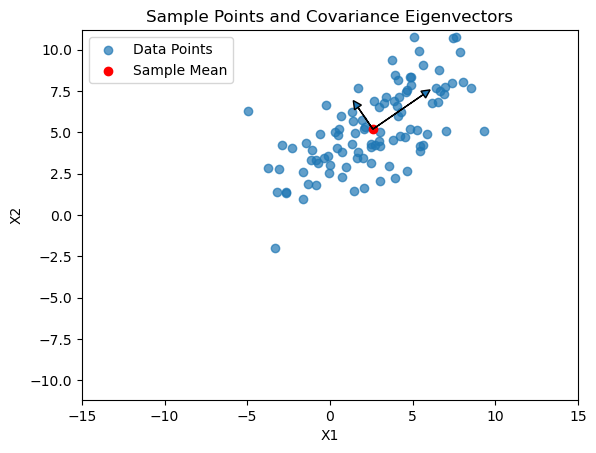

In [ ]:
plt.scatter(x1, x2, alpha=0.7, label='Points')

plt.scatter(mu[0], mu[1], color='red', label='Sample Mean')

for i in range(len(eigenvalues)):
    scaled_eigenvector = eigenvectors[:, i] * np.sqrt(eigenvalues[i])
    plt.arrow(
        mu[0],
        mu[1],
        scaled_eigenvector[0],
        scaled_eigenvector[1],
        head_width=0.5,
        head_length=0.5,
    )

plt.axis('equal')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sample Points and Covariance Eigenvectors')

plt.show()

Text(0.5, 1.0, 'Rotated Sample Points by Eigenvectors')

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


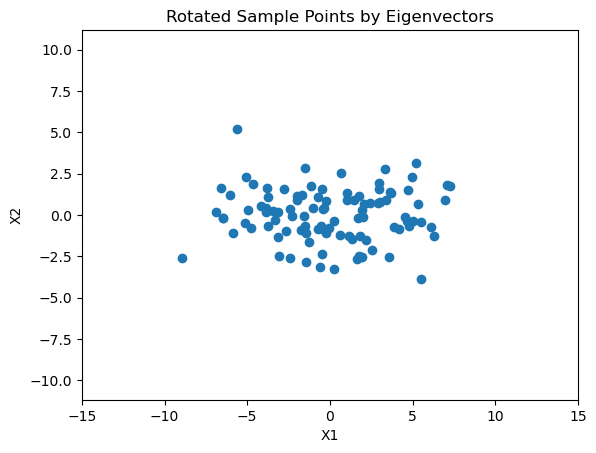

In [84]:
v1, v2 = eigenvectors[0], eigenvectors[1]
uv1, uv2 = v1 / np.linalg.norm(v1), v2 / np.linalg.norm(v2)
U = np.column_stack((uv1, uv2))
x1 = (x1 - mu[0]) 
x2 = (x2 - mu[1])
uX = np.column_stack((x1,x2))
rotatedX = uX.dot(U.T)
rx1 = rotatedX.T[0]
rx2 = rotatedX.T[1]

plt.scatter(rx1, rx2)
plt.axis('equal')
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Rotated Sample Points by Eigenvectors")
